In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Урок 5 "Время и сводные таблицы": Минипроект

# Описание данных

### date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
### name – имя пользователя
### transaction – статус транзакции
### minute* – сколько минут прошло с начала дня
#### *Доступна в данных с 7 шага.

# Задача 1 "Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику."

### Вопрос: сколько в датасете пропущенных значений?

In [27]:
# Загружаем датасет
transaction_data_df = pd.read_csv('D:курс_архив/my_files/lesson_5/transaction_data.csv')

In [28]:
transaction_data_df

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [29]:
# Смотрим типы
transaction_data_df.dtypes

date           object
name           object
transaction    object
dtype: object

In [32]:
# и количество пропущенных значений
transaction_data_df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

# Ответ 0 пропущенных значений

# Задача 2 "Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота."

## Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [34]:
# Проверяем, какие уникальные значения принимает колонка 'transaction' и сколько их
transaction_counts = df['transaction'].value_counts()
transaction_counts

transaction
successfull    3692
cancelled      1619
error             4
Name: count, dtype: int64

In [36]:
# Сортируем уровни переменной 'transaction' по количеству наблюдений в порядке убывания
transaction_counts_sorted = transaction_counts.sort_values(ascending=False)
transaction_counts_sorted

transaction
successfull    3692
cancelled      1619
error             4
Name: count, dtype: int64

<Axes: xlabel='transaction'>

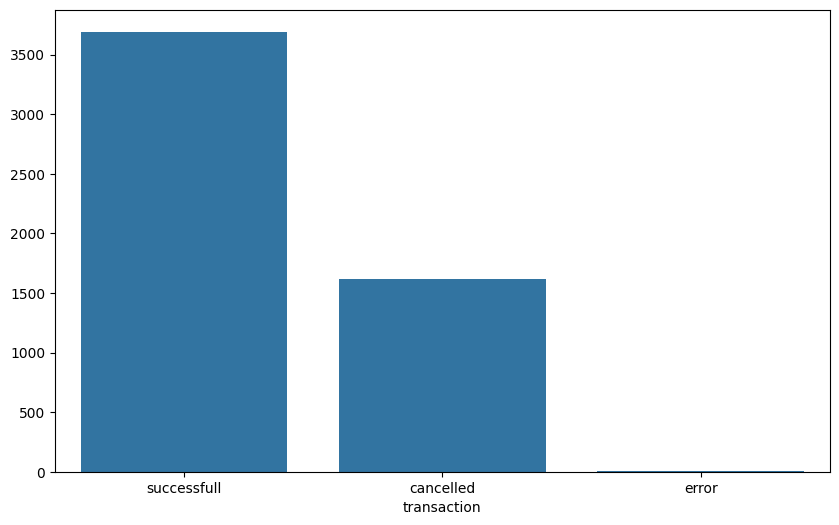

In [37]:
# Визуализируем результат с помощью барплота
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.barplot(x=transaction_counts_sorted.index, y=transaction_counts_sorted.values)

# Ответ 
## successfull    3692
## cancelled      1619
## error             4

# Задача 3 "Сколько произошло ошибок?"

# Ответ: error 4

# Задача 4 "Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull"

## Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где
### по оси x – число транзакций
### по оси y – доля пользователей с таким числом транзакций

In [45]:
# Фильтруем данные, оставляя только успешные транзакции (значение "successfull" в колонке 'transaction')
# Группируем данные по пользователям (колонка 'name'), считая количество успешных транзакций для каждого
count_of_successfull_transactions = transaction_data_df.query('transaction == "successfull"') \
    .groupby('name', as_index=False) \
    .agg({'transaction': 'count'})
count_of_successfull_transactions

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68
5,Ekaterina_Polyanova,68
6,Ekaterina_Smirnova,77
7,Irina_Fedorova,62
8,Irina_Ivanova,60
9,Irina_Lesnova,76


In [46]:
# Анализируем характеристики распределения числа успешных транзакций с помощью метода .describe()
# Этот метод предоставляет основные статистические показатели: среднее, медиана, минимум, максимум и квартильные значения.
count_of_successfull_transactions.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


C:\Users\bedzh\AppData\Local\Temp\ipykernel_2684\1143818292.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(count_of_successfull_transactions.transaction)


<Axes: xlabel='transaction', ylabel='Density'>

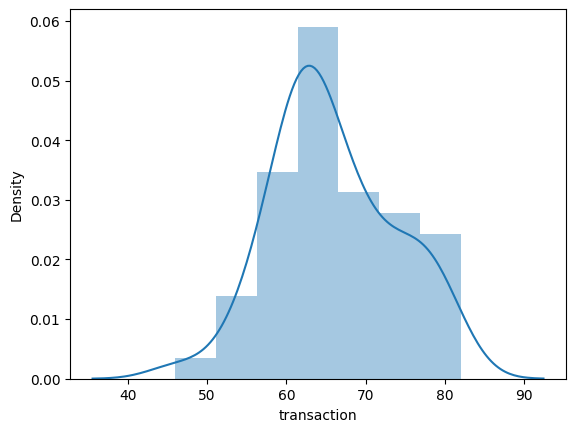

In [47]:
sns.distplot(count_of_successfull_transactions.transaction)

# Задача 5 "Постройте сводную таблицу user_vs_minute_pivot, где:"

## столбцы – имена пользователей
## строки – минута времени осуществления операции (minute)
## значения – число совершённых операций
### Пропущенные значения заполните нулями.

In [3]:
# Загрузим обновленный файл с данными о транзакциях
transaction_data_updated = pd.read_csv('D:курс_архив/my_files/lesson_5/transaction_data_updated.csv')
transaction_data_updated

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [4]:
# Сгруппируем данные по именам пользователей (name) и минутам (minute)
# При этом посчитаем количество транзакций для каждой комбинации пользователь/минута
new_transaction_data_updated = transaction_data_updated.groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction': 'count'})
new_transaction_data_updated

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [5]:
# Создадим сводную таблицу (pivot table), где:
# - строки (index) – это минуты (minute)
# - столбцы (columns) – это имена пользователей (name)
# - значения (values) – это количество совершённых транзакций (transaction)
# Пропущенные значения заполним нулями с помощью fillna(0)
user_vs_minute_pivot = new_transaction_data_updated.pivot(index='minute', columns='name', values='transaction').fillna(0)
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


# Задача 6 "Исправьте ошибку коллеги (если она есть), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения"

In [11]:
# Проверим типы данных в DataFrame, чтобы убедиться, что столбец 'date' имеет правильный формат
transaction_data_updated.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [12]:
# Преобразуем столбец 'date' в формат datetime, если это не так
# Это необходимо для работы с датой и временем (например, для извлечения минут и часов)
transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated.date)

In [13]:
# Проверим ещё раз типы данных, чтобы убедиться, что 'date' успешно преобразован в datetime
transaction_data_updated.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [14]:
# Вычислим количество минут, прошедших с начала дня
# Используем атрибуты dt.hour и dt.minute, чтобы получить количество минут, прошедших с начала дня
# Для этого прибавим количество минут к произведению часа на 60
transaction_data_updated['true_minute'] = (transaction_data_updated.date.dt.minute + transaction_data_updated.date.dt.hour * 60)

In [15]:
# Проверим обновлённый DataFrame с добавленной колонкой true_minute
transaction_data_updated

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [16]:
# Сгруппируем данные по новой колонке true_minute и посчитаем количество транзакций в каждой минуте
# Это позволяет увидеть, сколько операций было совершено в определённое количество минут с начала дня
transaction_data_updated.groupby('true_minute', as_index=False) \
    .agg({'transaction': 'count'})

,true_minute,transaction
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57
...,...,...
85,85,68
86,86,52
87,87,59
88,88,62


<Axes: xlabel='transaction', ylabel='true_minute'>

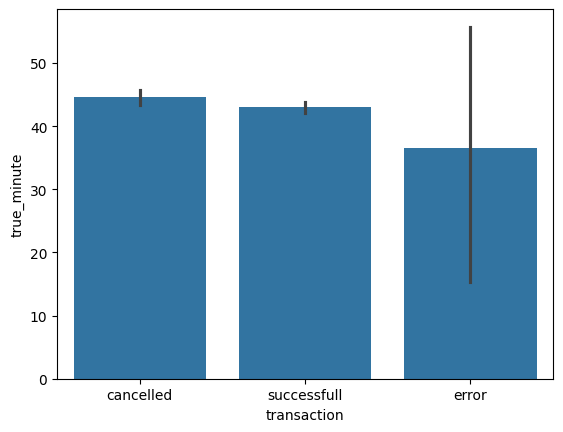

In [17]:
# Построим график, чтобы визуализировать количество транзакций по минутам
# Используем библиотеку seaborn для создания столбчатой диаграммы
# По оси X будет количество транзакций, по оси Y – минуты, прошедшие с начала дня (true_minute)
sns.barplot(x=transaction_data_updated.transaction, y=transaction_data_updated.true_minute)